In [5]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv("C:/Users/d3vsh/Downloads/dataset.csv")

In [7]:
data['SEX'] = data['sex'].replace(['Male', 'Female'], [1, 2])
data['DRK'] = data['DRK_YN'].replace(['Y', 'N'], [1, 2])
data['SMK'] = data['SMK_stat_type_cd'].replace([1,2,3], ['No', 'Quit', 'Yes'])


xgboost (drinking)

In [8]:
features_d = data[['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 
                   'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 
                   'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'SEX']]
target_d = data['DRK_YN']


features_d.shape, target_d.shape


((991346, 23), (991346,))

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target_d = le.fit_transform(target_d)

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_d_scaled = scaler.fit_transform(features_d)
features_d_scaled = pd.DataFrame(features_d_scaled, 
                               columns=['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 
                 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 
                 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'SEX'])

features_d_scaled.head()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,SEX
0,0.230769,0.666667,0.434783,0.082745,0.091837,0.091837,0.0,0.0,0.257282,0.313725,...,0.024424,0.009590,0.670833,0.0,0.009193,0.002000,0.004716,0.039078,0.0,0.0
1,0.153846,0.833333,0.478261,0.081736,0.081633,0.112245,0.0,0.0,0.305825,0.326797,...,0.028722,0.012646,0.616667,0.0,0.008172,0.001900,0.004855,0.026052,1.0,0.0
2,0.307692,0.583333,0.434783,0.083754,0.112245,0.142857,0.0,0.0,0.257282,0.248366,...,0.014263,0.010855,0.616667,0.0,0.008172,0.004601,0.004300,0.067134,0.0,0.0
3,0.461538,0.750000,0.478261,0.083754,0.142857,0.112245,0.0,0.0,0.378641,0.359477,...,0.020125,0.011065,0.691667,0.0,0.010215,0.002801,0.004578,0.017034,0.0,0.0
4,0.461538,0.583333,0.304348,0.072654,0.091837,0.112245,0.0,0.0,0.344660,0.326797,...,0.022665,0.010855,0.533333,0.0,0.007150,0.001800,0.001526,0.024048,0.0,0.0


In [11]:
from sklearn.model_selection import train_test_split

X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(features_d_scaled, target_d, test_size=0.2, random_state=1302)
X_d_train.shape, X_d_test.shape, y_d_train.shape, y_d_test.shape

((793076, 23), (198270, 23), (793076,), (198270,))

In [12]:
from xgboost import XGBClassifier

model_d = XGBClassifier(n_estimators=100, random_state=1302, eval_metric='mlogloss', use_label_encoder=False)
model_d.fit(X_d_train, y_d_train)

pred_d = model_d.predict_proba(X_d_test)[:, 1]
pred_d[:20]

c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

array([0.6810881 , 0.7563667 , 0.42446774, 0.5370252 , 0.85564023,
       0.3569485 , 0.22819431, 0.34178153, 0.40640512, 0.813933  ,
       0.859267  , 0.15359652, 0.5695166 , 0.02937677, 0.50255656,
       0.34659603, 0.6695665 , 0.64840925, 0.74505913, 0.17498185],
      dtype=float32)

In [13]:
pred_d_label = np.where(pred_d > 0.5, 1, 0)
pred_d_label[:20]

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [14]:
y_d_test[:20]

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_d_test, pred_d_label))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74     99195
           1       0.74      0.74      0.74     99075

    accuracy                           0.74    198270
   macro avg       0.74      0.74      0.74    198270
weighted avg       0.74      0.74      0.74    198270



In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear regression(drinking)

In [30]:
model = LinearRegression()

In [33]:
model.fit(X_d_train, y_d_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_d_test)

In [35]:
mse = mean_squared_error(y_d_test, y_pred)
r2 = r2_score(y_d_test, y_pred)

In [36]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.19
R-squared: 0.26


In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_d_test, pred_d_label)

array([[73296, 25899],
       [25731, 73344]], dtype=int64)

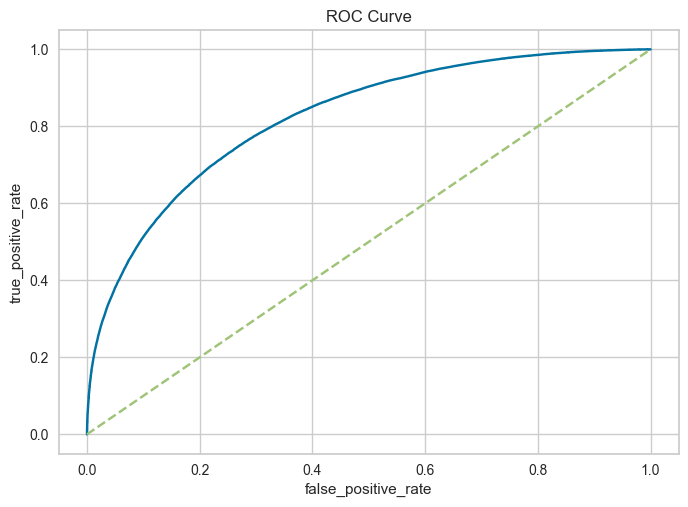

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_d_test, pred_d)

plt.title("ROC Curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.ylabel('true_positive_rate')
plt.xlabel('false_positive_rate')
plt.show()

In [18]:
roc_auc_score(y_d_test, pred_d)

0.8224290097993872

xgb model (smoking)

In [19]:
features_s = data[['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 
                   'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 
                   'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'DRK', 'SEX']]
target_s = data['SMK_stat_type_cd']

features_s.shape, target_s.shape

((991346, 23), (991346,))

In [20]:
target_s = le.fit_transform(target_s)

In [21]:
features_s_scaled = scaler.fit_transform(features_s)
features_s_scaled = pd.DataFrame(features_s_scaled, 
                               columns=['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 
                 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 
                 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'DRK', 'SEX'])

features_s_scaled.head()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK,SEX
0,0.230769,0.666667,0.434783,0.082745,0.091837,0.091837,0.0,0.0,0.257282,0.313725,...,0.024424,0.009590,0.670833,0.0,0.009193,0.002000,0.004716,0.039078,0.0,0.0
1,0.153846,0.833333,0.478261,0.081736,0.081633,0.112245,0.0,0.0,0.305825,0.326797,...,0.028722,0.012646,0.616667,0.0,0.008172,0.001900,0.004855,0.026052,1.0,0.0
2,0.307692,0.583333,0.434783,0.083754,0.112245,0.142857,0.0,0.0,0.257282,0.248366,...,0.014263,0.010855,0.616667,0.0,0.008172,0.004601,0.004300,0.067134,1.0,0.0
3,0.461538,0.750000,0.478261,0.083754,0.142857,0.112245,0.0,0.0,0.378641,0.359477,...,0.020125,0.011065,0.691667,0.0,0.010215,0.002801,0.004578,0.017034,1.0,0.0
4,0.461538,0.583333,0.304348,0.072654,0.091837,0.112245,0.0,0.0,0.344660,0.326797,...,0.022665,0.010855,0.533333,0.0,0.007150,0.001800,0.001526,0.024048,1.0,0.0


In [22]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(features_s_scaled, target_s, test_size=0.2, random_state=2309)
X_s_train.shape, X_s_test.shape, y_s_train.shape, y_s_test.shape

((793076, 23), (198270, 23), (793076,), (198270,))

In [23]:
model_s = XGBClassifier(n_estimators=100, random_state=2309, eval_metric='mlogloss', use_label_encoder=False)
model_s.fit(X_s_train, y_s_train)

pred_s = model_s.predict_proba(X_s_test)[:]
pred_s[:20]

c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

array([[0.5483969 , 0.09158225, 0.36002082],
       [0.9600333 , 0.01648799, 0.02347869],
       [0.24567571, 0.5343831 , 0.21994121],
       [0.93099576, 0.03189529, 0.03710892],
       [0.10452798, 0.28020018, 0.6152718 ],
       [0.42465454, 0.35279942, 0.22254606],
       [0.93406457, 0.0467275 , 0.01920793],
       [0.989268  , 0.00619827, 0.00453366],
       [0.28821847, 0.51904714, 0.19273444],
       [0.96286345, 0.01330959, 0.02382692],
       [0.18162054, 0.40353435, 0.4148451 ],
       [0.33095005, 0.37293425, 0.2961157 ],
       [0.47828886, 0.26190895, 0.25980216],
       [0.9078974 , 0.06035651, 0.0317461 ],
       [0.51828235, 0.40993047, 0.07178718],
       [0.14910208, 0.29638806, 0.5545099 ],
       [0.2102211 , 0.39973474, 0.39004412],
       [0.5649055 , 0.15535066, 0.27974385],
       [0.93558514, 0.02554337, 0.03887147],
       [0.32344624, 0.29939047, 0.37716326]], dtype=float32)

In [24]:
classes = np.unique(target_s)
classes

array([0, 1, 2], dtype=int64)

In [25]:
y_s_test[:20]

array([1, 0, 2, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2],
      dtype=int64)

In [26]:
print(model_s.score(X_s_train, y_s_train))
print(model_s.score(X_s_test, y_s_test))

c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

0.7201226616364635


c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

0.7083875523276341


c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\d3vsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

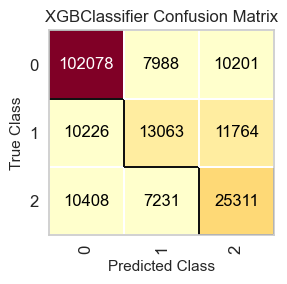

ConfusionMatrix(ax=<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=array([0, 1, 2], dtype=int64),
                cmap=<matplotlib.colors.ListedColormap object at 0x000002A29D229D50>,
                estimator=XGBClassifier(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=No...
                                        grow_policy=None, importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=None, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=None,
                                        max_leaves=None, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        multi_strategy=None, n_estimators=100,
                                        n_jobs=None, num_parallel_tree=None,
                                        objective='multi:softprob', ...))

In [27]:
import matplotlib.pyplot as plt

from yellowbrick.classifier import confusion_matrix

plt.figure(figsize=(3, 3))
confusion_matrix(model_s, X_s_train, y_s_train, X_s_test, y_s_test, classes=classes)

linear regression model (smoking)

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_s_train, y_s_train)


LinearRegression()

In [39]:
y_pred = model.predict(X_s_test)

In [40]:
mse = mean_squared_error(y_s_test, y_pred)
r2 = r2_score(y_s_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.41
R-squared: 0.39


linear regression is good for simple data but if data is complex and need high accuracy xgboost give more accurate prediction.
xgboost uses comples algorithm and non linear relation, useful when large number of features.

l